# Math Operations in `numpy` and `PyTorch` Related to Deep Learning

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

## Vector and Matrix Tranpose 

### Transpose Using Numpy

In NumPy, the transpose function is used to change the axes of an array. However, transposing a 1-dimensional array (vector) like [1, 2, 3, 4] doesn't change its shape. 

In [2]:
# create a vector
vector = np.array([1,2,3,4])
print(vector), print(' ')

# transpose it
print(vector.T), print(' ')

[1 2 3 4]
 
[1 2 3 4]
 


(None, None)

The transpose function is more meaningful when applied to multi-dimensional arrays.

In [3]:
# create a vector
vector = np.array(
    [ [1,2,3,4], 
      [5, 6, 7, 8] ])
print(vector), print(' ')

# transpose it
print(vector.T), print(' ')

# transpose the transpose
print(vector.T.T), print(' ')

[[1 2 3 4]
 [5 6 7 8]]
 
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
 
[[1 2 3 4]
 [5 6 7 8]]
 


(None, None)

### Transpose Using PyTorch

In [4]:
# create a vector
tv = torch.tensor(
    [[1,2,3,4],
     [4,5,6,7]]
)
print(tv), print(' ')

# transpose the tensor
print(tv.T), print(' ')

# transpose the transpose
print(tv.T.T), print(' ')

tensor([[1, 2, 3, 4],
        [4, 5, 6, 7]])
 
tensor([[1, 4],
        [2, 5],
        [3, 6],
        [4, 7]])
 
tensor([[1, 2, 3, 4],
        [4, 5, 6, 7]])
 


(None, None)

## Dot Product

The dot product (also known as the scalar product) is an algebraic operation that takes two ___equal-length___ sequences of numbers (usually vectors) and returns a single number. The dot product is defined as the sum of the products of the corresponding entries of the two sequences of numbers.

___Important___:

* _Dot product can also be calculated for two ___equal-sized___ matracis._
* _Another way to look at dot product may be it produces a single number that reflects the commonalities between two objects (vectors, matrices, tensors, signals, images etc.)_

#### Definition

For two vectors `a` and `b` in n-dimensional space:

$$
ab = \sum_{i=1}^n a_i \cdot b_i = a_1 \cdot b_1 + a_2 \cdot b_2 + ... + a_n \cdot b_n
$$  

where $ a = (a_1, a_2, ..., a_n)$ and $b = (b_1, b_2, ..., b_n) $

Other ways to denote a dot product may include: $ <a, b> $ , $ a^{\text{T}}b $

#### Geometric Interpretation

The dot product also has a geometric interpretation. It is related to the cosine of the angle between the two vectors:
$$
ab = ||a|| ||b|| cos( \theta )
$$

where a and b are the magnitudes (lengths) of vectors a and b, respectively, and &theta; is the angle between the two vectors.

### Applications of Dot Products

Dot product is the computational backbone of many operations. Just to list a few:

* **Statistics**: correlation, least-squares, entropy, PCA
* **Signal Processing**: Fourier transform, filtering
* **Science**: Geometry, physics, mechanics
* **Linear Algebra**: projection, transformations, multiplication
* **Deep Learning**: convolution, matrix multiplication, Gram matrix (used in style transfer)

### Numpy operations for Dot Product

In [5]:
nv1 = np.array([1,2,3,4])
nv2 = np.array([0,1,0,-1])

# dot product function
print (np.dot(nv1, nv2))

# dot product via computation
print (np.sum( nv1 * nv2 ))

-2
-2


### Pytorch operations for Doc Product

In [4]:
tv1 = torch.tensor([1,2,3,4])
tv2 = torch.tensor([0,1,0,-1])

# dot product via function
print(torch.dot(tv1, tv2))

# dot product via computation
print(torch.sum( tv1 * tv2 ))

tensor(-2)
tensor(-2)


___Note that Pytorch produces 2 one-element `tensor` objects while Numpy produces 2 scalars.___

#### Test If CUDA support Is Available

In [8]:
torch.cuda.is_available()

True

## Matrix Multiplication

Key concepts: 
1. How to refer to matrix sizes
1. The rule of matrix multiplication validity
1. One of ways to conceptualize and implement matrix multilication.

### Size of Matrices

Matrix size can be expressed as `(m, n)`, where m is the number of rows, and n is the number of columns. 

### The Rules of Validity for Matrices Multiplication

When two matrices are to be multiplied, say matrix 1 is of $(m, n)$ and the matrix 2 is of size $(x, y)$, then $n$ must equal to $x$ (the inner dimensions must be equal). 

* Valid:  $ M1(m, n) \times M2(n, t) \\ $
* Invalid: $ M1(m, n) \times M2(t, m) \\ $
* Invalid:  $ M1(m, n) \times M2(x, y) $ where $ n \not= x $

Two matrices multiplication yields in a matrix with the size of the first matrix's number of rows by the second matrix's number of columns: 
$$
\big[ m, n \big] \times \bigg[ n, k \bigg] = \big[ m, k \big]
$$

### Numpy for Matrices Multiplication 

In [14]:
A = np.round(np.random.randn(3,4), 2)
B = np.round(np.random.randn(4,5), 2)
C = np.round(np.random.randn(3,7), 2)

print(A), print(' ')
print(B), print(' ')

# "@": Python's matrix multiplication 
print('results'), print(np.round( A@B, 2))

# np.matmul(A,B) is equivalent to Python's A@B
print(' '), print(np.round(np.matmul(A, B), 2))  

[[-0.6  -0.04 -0.05 -0.74]
 [ 1.13 -0.26 -1.93 -0.49]
 [-0.78  1.14 -0.62  2.71]]
 
[[-1.01  0.05 -0.06 -0.69  1.32]
 [ 1.34  1.69  0.14  2.22 -1.8 ]
 [ 1.68  1.14 -0.01 -0.2   0.96]
 [ 1.75  0.59  1.61  0.18 -1.02]]
 
results
[[-0.83 -0.59 -1.16  0.2  -0.01]
 [-5.59 -2.87 -0.87 -1.06  0.61]
 [ 6.02  2.78  4.58  3.68 -6.44]]
 
[[-0.83 -0.59 -1.16  0.2  -0.01]
 [-5.59 -2.87 -0.87 -1.06  0.61]
 [ 6.02  2.78  4.58  3.68 -6.44]]


(None, None)

## Softmax

Softmax is a mathematical function often used in machine learning, particularly in classification problems. It converts a vector of numbers into a probability distribution. Essentially, it helps determine the probability that a given input belongs to each class.

### How It Works

The softmax function takes as input a vector of scores (raw values), and outputs a probability distribution. Mathematically, it's defined as:

Given the vector of scores $x = \{1, 2, 3\}$, where:
* $x_i$ is the score for class $i$
* $n$ is the number of classes
* $e$ is the base of the natural logarithm

then the softmax of class $i$ that having score $x_i$, can be represented by:

$$
\sigma_i = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} \\
$$

This basically says that, the probability of score value $x_i$ appearing in class $i$ is $\sigma_i$

### What is Softmax Used For?

1. **Multi-Class Classification**: In neural networks, softmax is commonly used in the output layer when dealing with multi-class classification tasks. It transforms the raw output scores of the neural network into probabilities that sum to $1$. Each probability represents the likelihood that the input belongs to a specific class.

1. **Logistic Regression**: Softmax is used in the logistic regression for multi-class classification problems. It extends the binary logistic regression to handle multiple classes.

1. **Reinforcement Learning**: In reinforcement learning, softmax can be used in action selection policies, where it helps determine the probability of selecting each action based on their respective action-value estimates.

1. **Natural Language Processing (NLP)**: Softmax is used in NLP tasks like language modeling and machine translation. In these models, softmax is used to predict the next word in a sequence, converting logits into word probabilities.

In a neural network designed to classify images of handwritten digits (like the MNIST dataset), the final layer might use the softmax function to output a probability distribution over the ten possible digit classes (0 through 9). The class with the highest probability is taken as the network's prediction.

The softmax function is essential because it provides a clear and interpretable way to represent uncertainty in model predictions, making it a fundamental component of many machine learning models.

### Python Computation - Numpy

x= [-10  12  -4  -4 -15  -4 -13  12  11  -4   7  -8   9  -4  -8   9   4  -5
   2   2 -10  -9   6 -14 -11  -5  -1   8   5  -7   6]
numerator= [4.53999298e-05 1.62754791e+05 1.83156389e-02 1.83156389e-02
 3.05902321e-07 1.83156389e-02 2.26032941e-06 1.62754791e+05
 5.98741417e+04 1.83156389e-02 1.09663316e+03 3.35462628e-04
 8.10308393e+03 1.83156389e-02 3.35462628e-04 8.10308393e+03
 5.45981500e+01 6.73794700e-03 7.38905610e+00 7.38905610e+00
 4.53999298e-05 1.23409804e-04 4.03428793e+02 8.31528719e-07
 1.67017008e-05 6.73794700e-03 3.67879441e-01 2.98095799e+03
 1.48413159e+02 9.11881966e-04 4.03428793e+02]  
denominator= 406692.6053127916
sigma= [1.11632051e-10 4.00191175e-01 4.50355838e-08 4.50355838e-08
 7.52170845e-13 4.50355838e-08 5.55783257e-12 4.00191175e-01
 1.47222106e-01 4.50355838e-08 2.69646692e-03 8.24855489e-10
 1.99243454e-02 4.50355838e-08 8.24855489e-10 1.99243454e-02
 1.34249183e-04 1.65676654e-08 1.81686512e-05 1.81686512e-05
 1.11632051e-10 3.03447376e-10 9.9197474

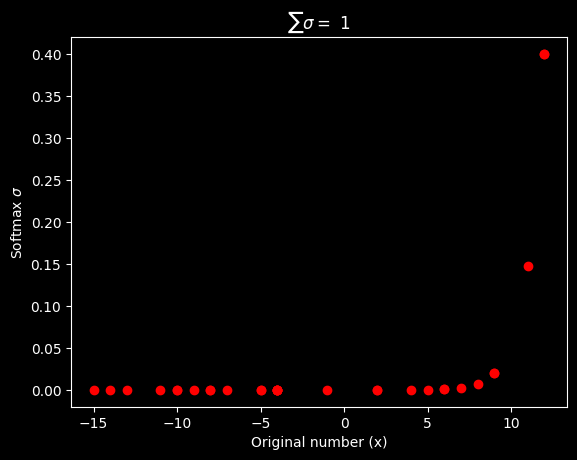

In [38]:
x = np.random.randint(-15, high=15, size=31)
print("x=", x)

numerator = np.exp(x)
denominator = np.sum(numerator)
print("numerator=", numerator, ' \ndenominator=', denominator)

sigma = numerator/denominator

print("sigma=", sigma) 
print("sum(sigma)=", np.sum(sigma))

plt.plot(x, sigma, "ro")
plt.xlabel("Original number (x)")
plt.ylabel("Softmax $\\sigma$")

# play with yscale to see differences: 
# plt.yscale("log")

plt.title( "$\\sum\\sigma =$ %g" %np.sum(sigma))
plt.show()

### Python Computation - PyTorch

tensor([1.1163e-10, 4.0019e-01, 4.5036e-08, 4.5036e-08, 7.5217e-13, 4.5036e-08,
        5.5578e-12, 4.0019e-01, 1.4722e-01, 4.5036e-08, 2.6965e-03, 8.2486e-10,
        1.9924e-02, 4.5036e-08, 8.2486e-10, 1.9924e-02, 1.3425e-04, 1.6568e-08,
        1.8169e-05, 1.8169e-05, 1.1163e-10, 3.0345e-10, 9.9197e-04, 2.0446e-12,
        4.1067e-11, 1.6568e-08, 9.0456e-07, 7.3298e-03, 3.6493e-04, 2.2422e-09,
        9.9197e-04])


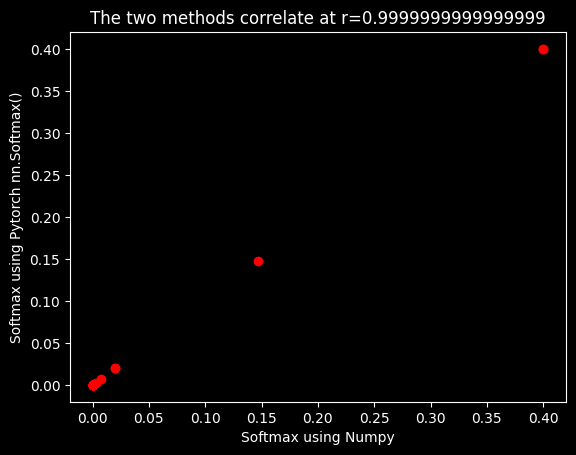

In [49]:
# more work using Pytorch than Numpy

# Create an instance of softmax activation class
softmax = nn.Softmax(dim=0)

# apply the data to the function
sigmaT = softmax(torch.Tensor(x))
print(sigmaT)

plt.plot(sigma, sigmaT, "ro")
plt.xlabel("Softmax using Numpy")
plt.ylabel("Softmax using Pytorch nn.Softmax()")
plt.title( f"The two methods correlate at r={np.corrcoef(sigma, sigmaT)[0,1]}")
plt.show()